In [15]:
# Cell 1: 라이브러리 임포트 및 데이터 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebook 내에서 그래프 인라인 표시
%matplotlib inline

# CSV 파일 읽기 (파일 경로를 상황에 맞게 수정)
file_path = 'eval/metrics/multi/CNN.csv'
df = pd.read_csv(file_path)

# 데이터의 앞부분 확인
display(df.head())

,file,Time,AUC-PR,AUC-ROC,VUS-PR,VUS-ROC,Standard-F1,PA-F1,Event-based-F1,R-based-F1,Affiliation-F
0,001_Genesis_id_1_Sensor_tr_4055_1st_15538.csv,11.730119,0.037114,0.941636,0.047145,0.952713,0.124997,0.609756,0.157895,0.135412,0.861851
1,002_MSL_id_1_Sensor_tr_500_1st_900.csv,0.992923,0.145864,0.713807,0.147891,0.913487,0.374996,0.916667,0.750000,0.370968,0.898713
2,003_MSL_id_2_Sensor_tr_883_1st_1238.csv,1.011957,0.150668,0.708372,0.176502,0.765119,0.324708,0.926829,0.500000,0.171827,0.751782
3,005_MSL_id_4_Sensor_tr_855_1st_2700.csv,1.310626,0.067460,0.800451,0.083010,0.862054,0.160147,0.972603,0.333333,0.205479,0.918323
4,006_MSL_id_5_Sensor_tr_1150_1st_1250.csv,2.434173,0.098061,0.527997,0.101431,0.533500,0.231013,0.537433,0.154492,0.033698,0.670647


In [16]:
# Cell 2: 기본 통계량 확인
# 숫자형 변수에 대해 describe()로 요약 통계량을 확인합니다.
display(df.describe())


,Time,AUC-PR,AUC-ROC,VUS-PR,VUS-ROC,Standard-F1,PA-F1,Event-based-F1,R-based-F1,Affiliation-F
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,14.699529,0.352050,0.773209,0.356713,0.808904,0.414123,0.823706,0.645298,0.303154,0.867498
std,17.412792,0.355104,0.177141,0.357684,0.164553,0.331112,0.274958,0.363429,0.239504,0.118687
min,0.280139,0.006324,0.303580,0.006795,0.314258,0.018783,0.014604,0.014604,0.006808,0.666677
25%,2.455244,0.071173,0.642928,0.070728,0.697892,0.156151,0.810057,0.320113,0.131280,0.765630
50%,7.483268,0.191316,0.771180,0.207212,0.826585,0.323074,0.968420,0.753378,0.303932,0.883134
75%,20.546014,0.602283,0.947824,0.649015,0.968772,0.662282,0.998976,0.993845,0.374186,0.990645
max,97.391162,0.999992,1.000000,0.999850,0.999996,0.998967,1.000000,1.000000,0.998919,0.999942


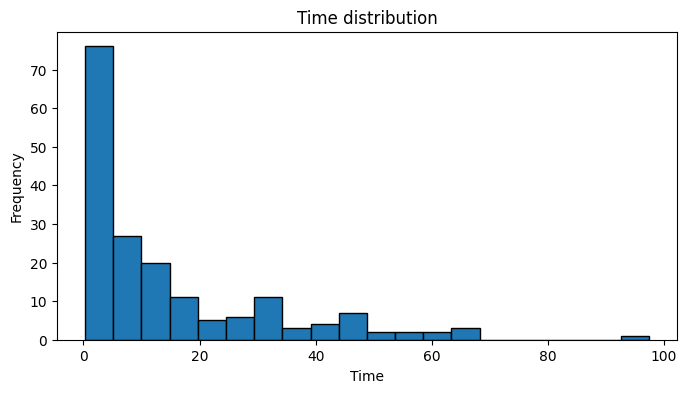

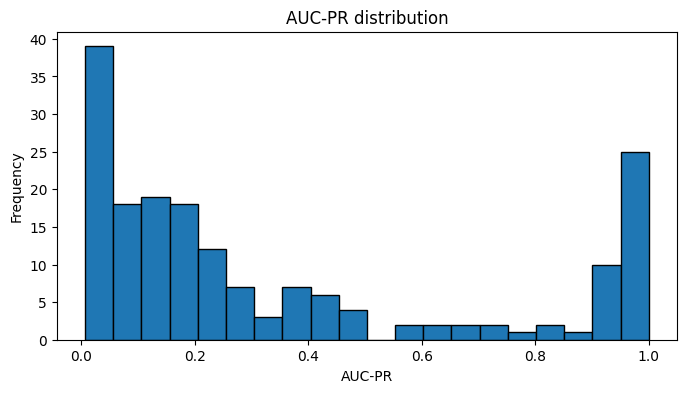

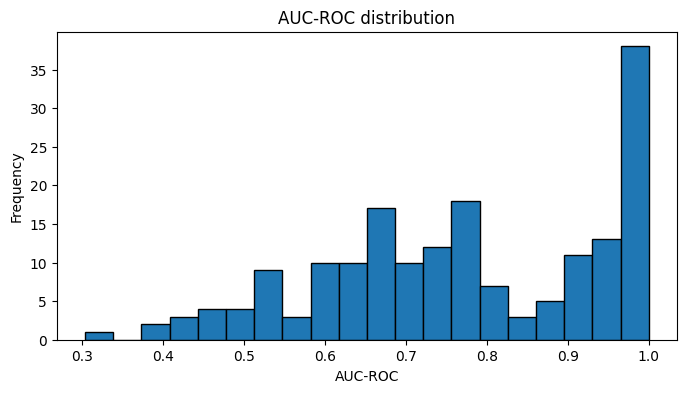

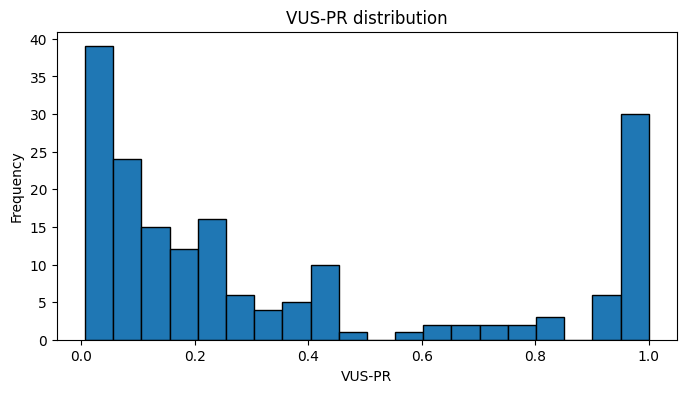

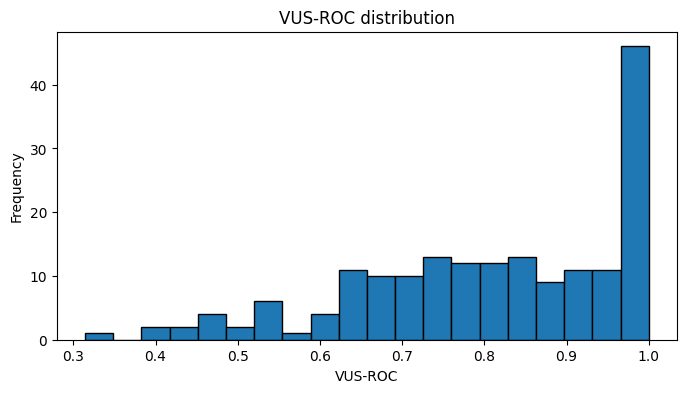

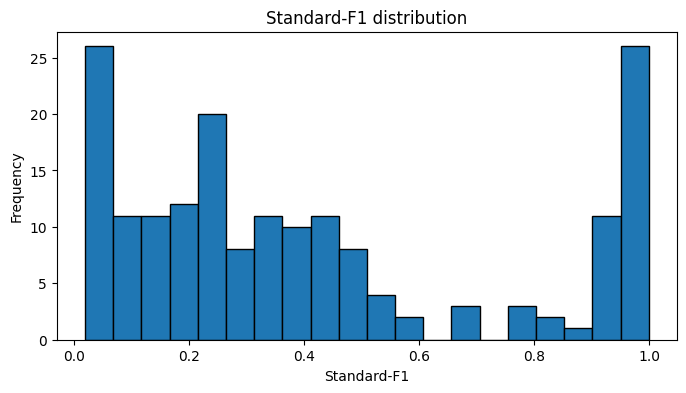

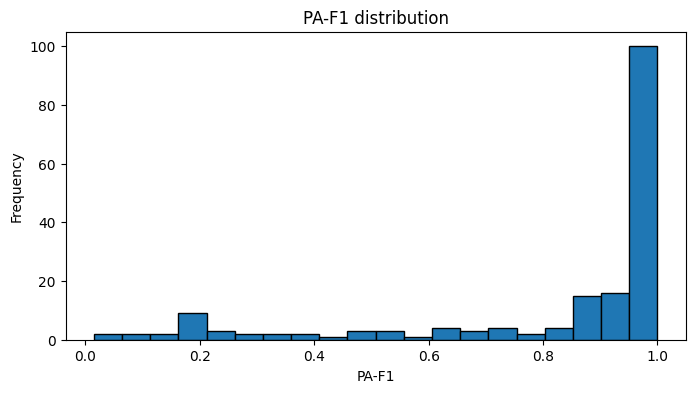

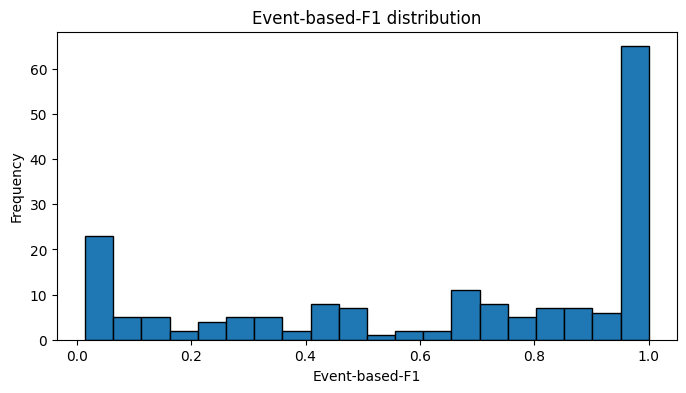

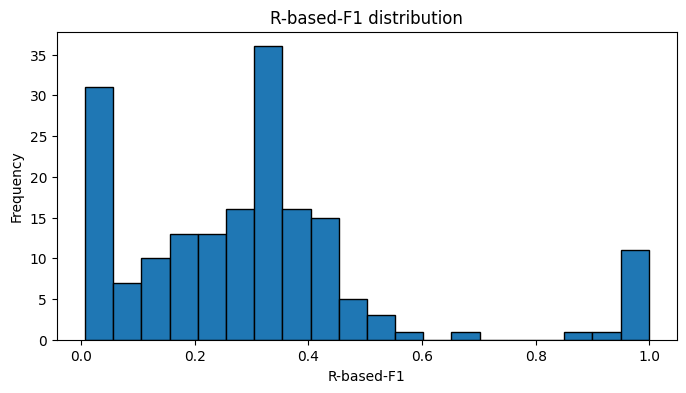

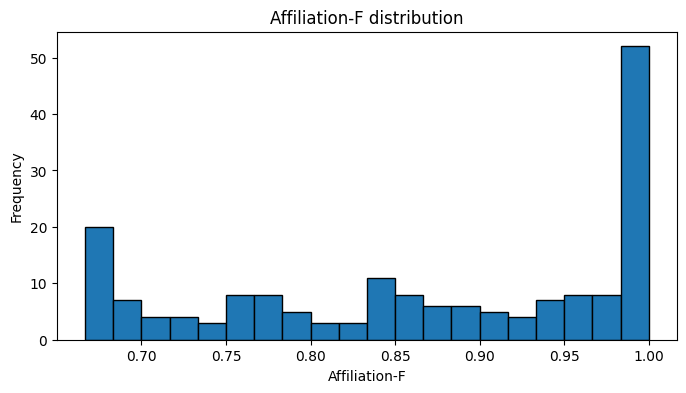

In [17]:
# Cell 3: 각 성능 지표의 분포(히스토그램) 시각화
# 'file' 열은 범주형이므로 제외하고 나머지 열의 분포를 확인합니다.
numeric_cols = df.columns.drop('file')
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


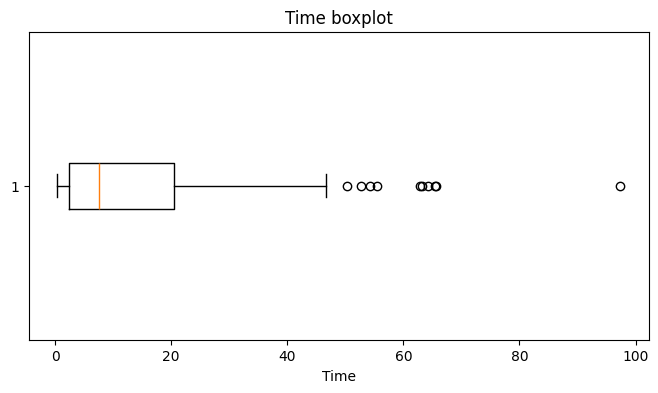

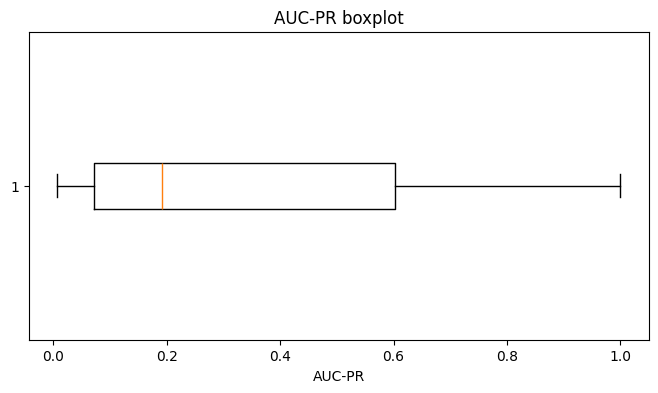

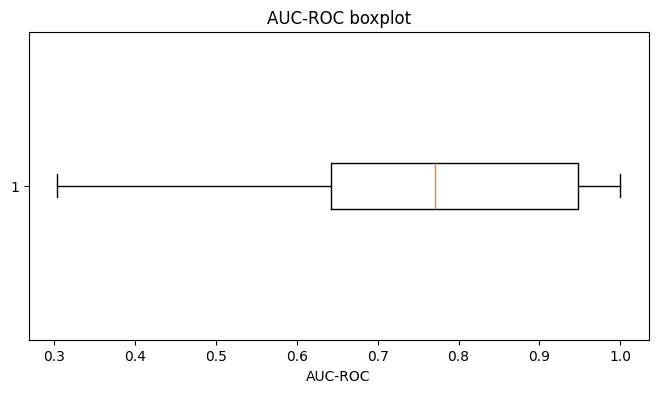

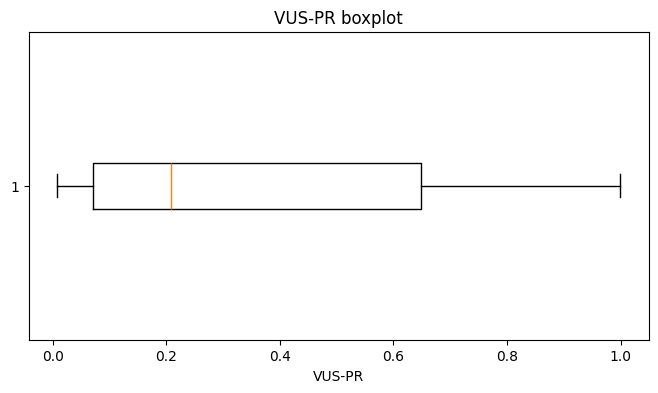

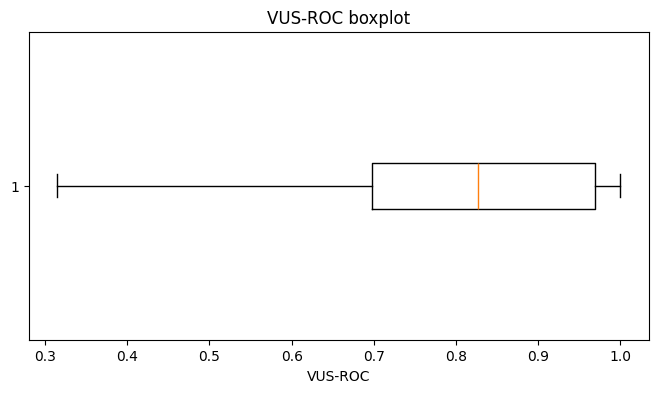

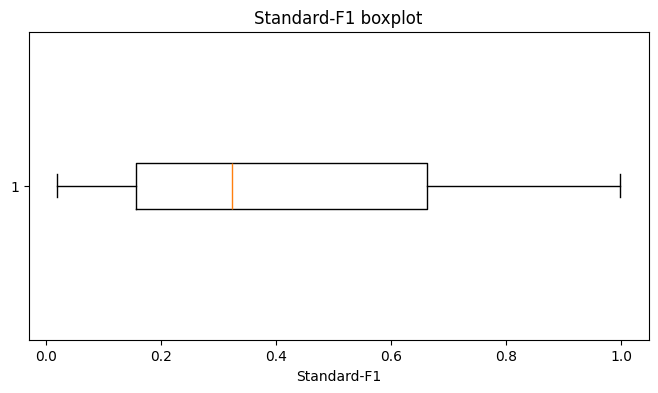

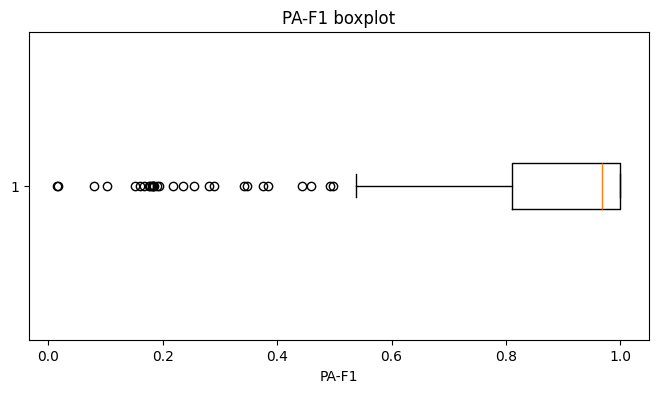

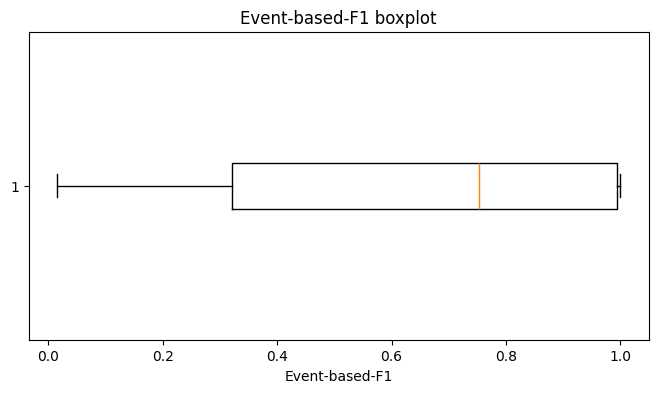

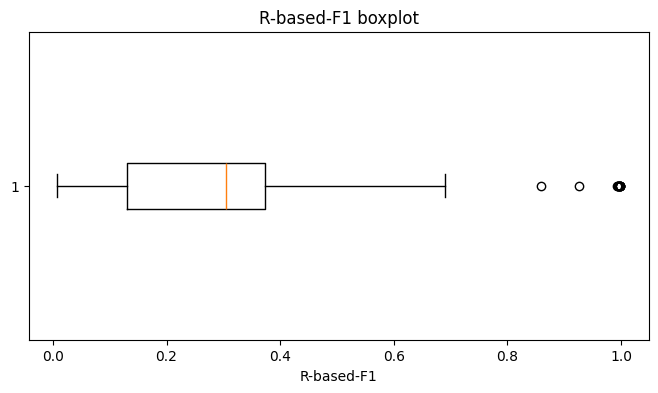

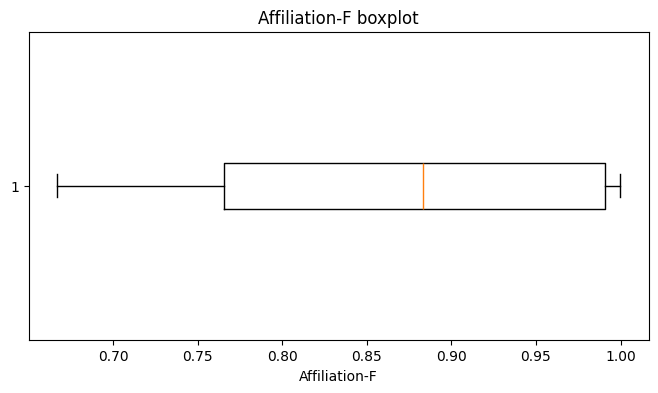

In [18]:
# Cell 4: 각 성능 지표의 박스플롯 시각화 (이상치 및 분포 확인)
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'{col} boxplot')
    plt.xlabel(col)
    plt.show()


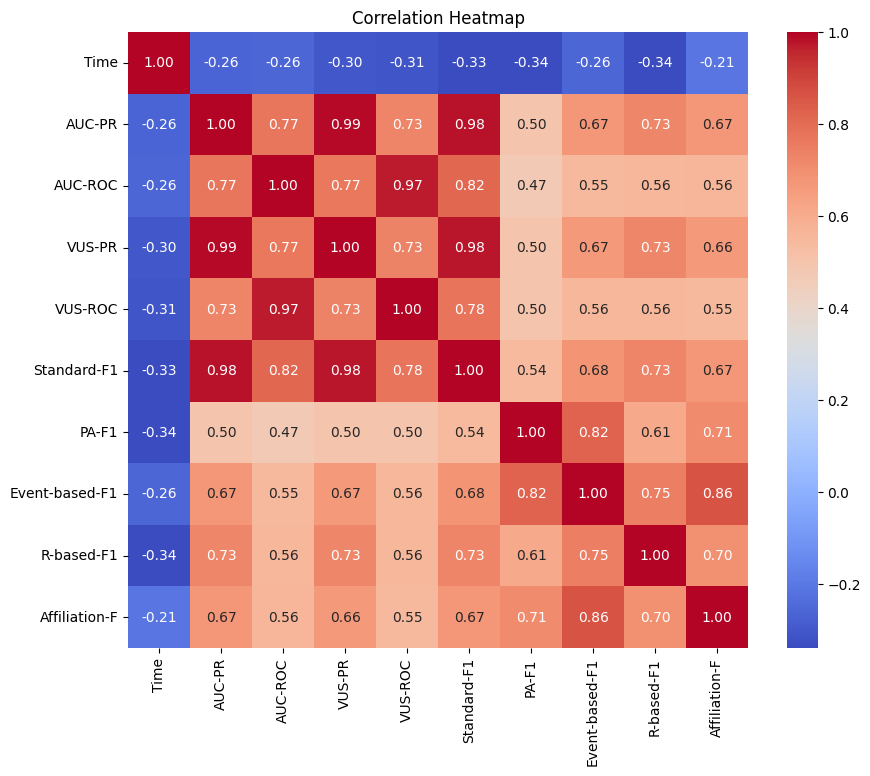

In [19]:
# Cell 5: 성능 지표 간의 상관 관계 히트맵
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


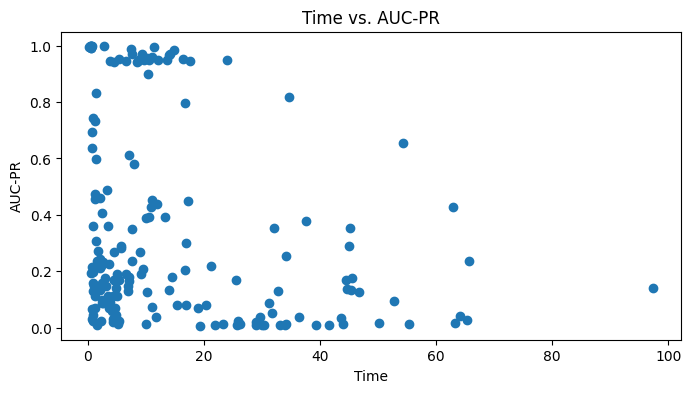

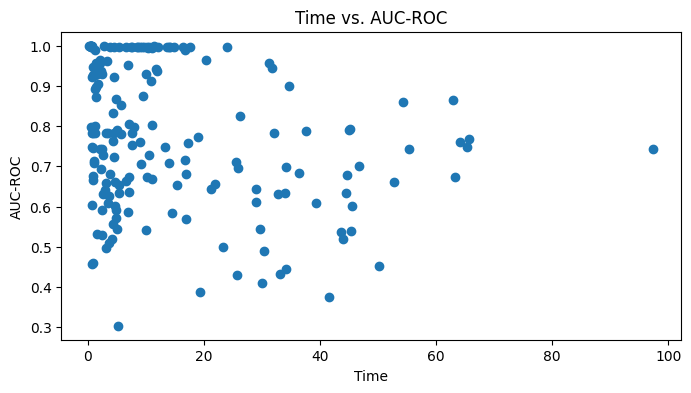

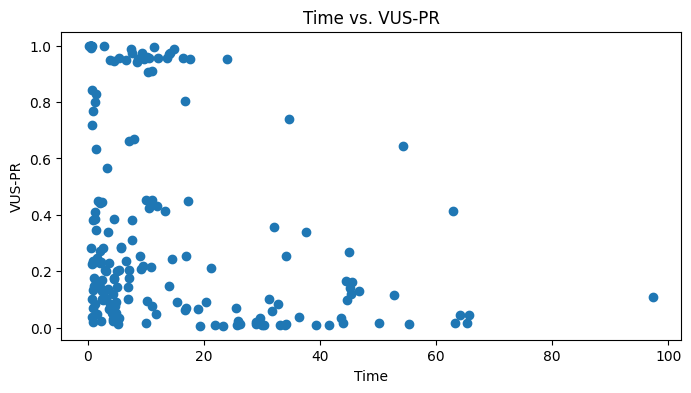

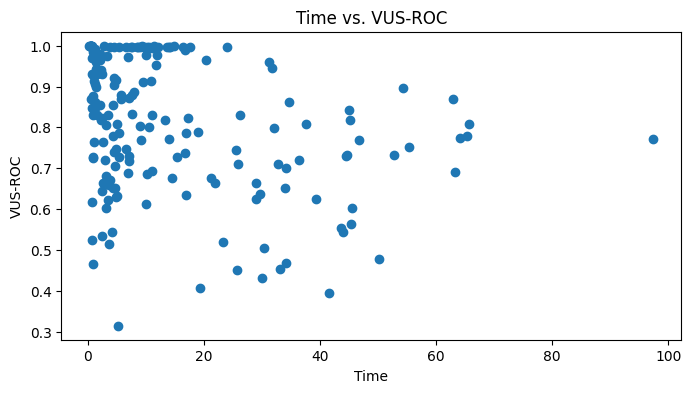

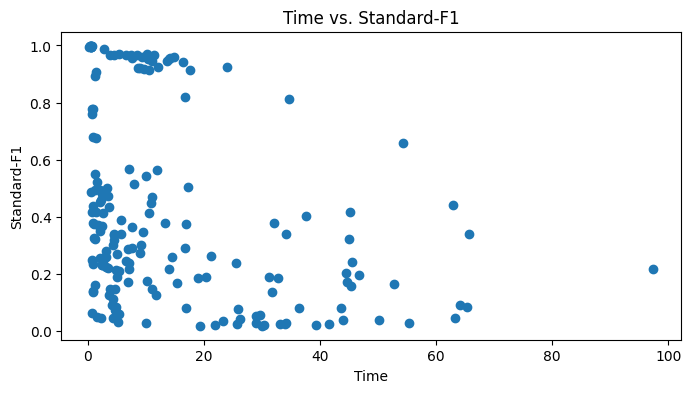

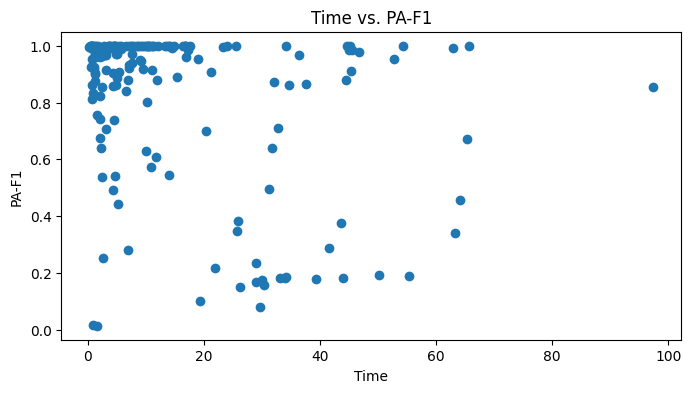

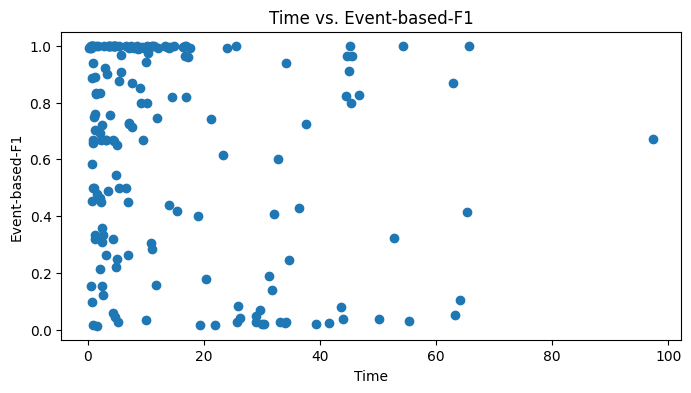

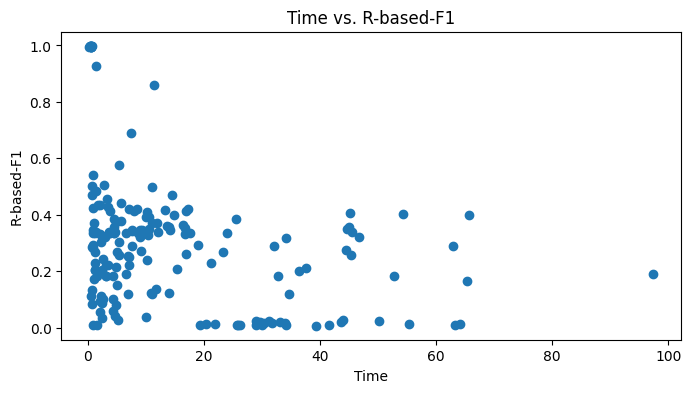

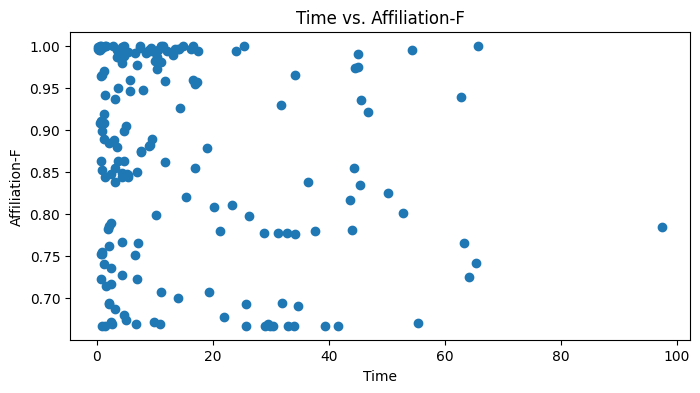

In [20]:
# Cell 6: 실행 시간(Time)과 다른 성능 지표 간의 관계(Scatter Plot)
time_metric = 'Time'
# Time을 제외한 나머지 숫자형 성능 지표
other_metrics = [col for col in numeric_cols if col != time_metric]

for col in other_metrics:
    plt.figure(figsize=(8, 4))
    plt.scatter(df[time_metric], df[col])
    plt.title(f'{time_metric} vs. {col}')
    plt.xlabel(time_metric)
    plt.ylabel(col)
    plt.show()
